In [66]:
import pandas as pd
#Train data information
train_data = pd.read_csv('../train.csv', dtype='object')
df_train = pd.DataFrame(train_data)
print('This is train data dicribution information')
print(df_train.head(10))

#test data information

test_data = pd.read_csv('../test.csv')
df_test = pd.DataFrame(test_data)
print('This is test data dicribution information')
print(df_test.head(10))

#Store data information

store_data = pd.read_csv('../store.csv', dtype='object')
df_store = pd.DataFrame(store_data)
print('This is store data dicribution information')
print(df_store.head(10))
print(df_train.columns)


This is train data dicribution information
  Store DayOfWeek        Date  Sales Customers Open Promo StateHoliday  \
0     1         5  2015-07-31   5263       555    1     1            0   
1     2         5  2015-07-31   6064       625    1     1            0   
2     3         5  2015-07-31   8314       821    1     1            0   
3     4         5  2015-07-31  13995      1498    1     1            0   
4     5         5  2015-07-31   4822       559    1     1            0   
5     6         5  2015-07-31   5651       589    1     1            0   
6     7         5  2015-07-31  15344      1414    1     1            0   
7     8         5  2015-07-31   8492       833    1     1            0   
8     9         5  2015-07-31   8565       687    1     1            0   
9    10         5  2015-07-31   7185       681    1     1            0   

  SchoolHoliday  
0             1  
1             1  
2             1  
3             1  
4             1  
5             1  
6             1 

In [2]:
print('Check if there is null values')

import pandas as pd

# Assuming df_train, df_test, and df_store are already defined DataFrames
# Otherwise, you need to read them first using pd.read_csv

print('Check if there are null values in the training data:')
print(df_train.isnull().sum())

print('Check if there are null values in the test data:')
print(df_test.isnull().sum())

print('Check if there are null values in the store data:')
print(df_store.isnull().sum())



Check if there is null values
Check if there are null values in the training data:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
Check if there are null values in the test data:
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64
Check if there are null values in the store data:
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [59]:
print('Distribution of training data set')
for col in df_train.columns:
    df_train[col] = pd.to_numeric(df_train[col], errors='ignore')

# Separate numerical and categorical columns
numerical_columns = df_train.select_dtypes(include='number').columns
categorical_columns = df_train.select_dtypes(exclude='number').columns

for column in numerical_columns:
    df_train[column] = df_train[column].fillna(df_train[column].mean())
    print(f'mean of {column} column: {df_train[column].mean()}')
    print(f'std of {column} column: {df_train[column].std()}')
    print(f'skew of {column} column: {df_train[column].skew()}')

for category in categorical_columns:
    if not df_train[category].isnull().all():  # Check if not all values are NaN
        df_train[category] = df_train[category].ffill()
        frequency_counts = df_train[category].value_counts()
        if not frequency_counts.empty:
            print(f'Frequency of the column {category}:\n{frequency_counts}\n')
        else:
            print(f'Column {category} has no valid values after forward filling.\n')
    else:
        print(f'Column {category} is entirely NaN.\n')


    

Distribution of training data set


C:\Users\User\AppData\Local\Temp\ipykernel_8488\425591342.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_train[col] = pd.to_numeric(df_train[col], errors='ignore')


mean of Store column: 558.4297268309659
std of Store column: 321.9086511434535
skew of Store column: -0.0009548799809840561
mean of DayOfWeek column: 3.998340557348588
std of DayOfWeek column: 1.997390964940531
skew of DayOfWeek column: 0.0015928228042007859
mean of Date column: 1.3971798428460618e+18
std of Date column: 2.3712834841054444e+16
skew of Date column: 0.049882091793195665
mean of Sales column: 5773.818972305593
std of Sales column: 3849.92617523476
skew of Sales column: 0.6414596158103787
mean of Customers column: 633.1459464082602
std of Customers column: 464.4117338866325
skew of Customers column: 1.5986502899508919
mean of Open column: 0.8301066939045958
std of Open column: 0.3755392246931948
skew of Open column: -1.7580445463163024
mean of Promo column: 0.3815145166824124
std of Promo column: 0.4857586048774201
skew of Promo column: 0.4878378482245105
mean of SchoolHoliday column: 0.17864666946517382
std of SchoolHoliday column: 0.3830563681809262
skew of SchoolHoliday

In [3]:
print('Distribution of test data set')
for col in df_test.columns:
    df_test[col] = pd.to_numeric(df_test[col], errors='ignore')

# Separate numerical and categorical columns
numerical_columns = df_test.select_dtypes(include='number').columns
categorical_columns = df_test.select_dtypes(exclude='number').columns

for column in numerical_columns:
    df_test[column] = df_test[column].fillna(df_test[column].mean())
    print(f'mean of {column} column: {df_test[column].mean()}')
    print(f'std of {column} column: {df_test[column].std()}')
    print(f'skew of {column} column: {df_test[column].skew()}')

for category in categorical_columns:
    if not df_test[category].isnull().all():  # Check if not all values are NaN
        df_test[category] = df_test[category].ffill()
        frequency_counts = df_test[category].value_counts()
        if not frequency_counts.empty:
            print(f'Frequency of the column {category}:\n{frequency_counts}\n')
        else:
            print(f'Column {category} has no valid values after forward filling.\n')
    else:
        print(f'Column {category} is entirely NaN.\n')


Distribution of test data set
mean of Id column: 20544.5
std of Id column: 11861.228266920758
skew of Id column: 0.0
mean of Store column: 555.8995327102804
std of Store column: 320.27449594179905
skew of Store column: 0.010899089660083232
mean of DayOfWeek column: 3.9791666666666665
std of DayOfWeek column: 2.0154812917056164
skew of DayOfWeek column: 0.02846777394230424
mean of Open column: 0.8543223701828273
std of Open column: 0.3527398010219591
skew of Open column: -2.0090708051424606
mean of Promo column: 0.3958333333333333
std of Promo column: 0.48903489253273635
skew of Promo column: 0.426029876076697
mean of SchoolHoliday column: 0.4434871495327103
std of SchoolHoliday column: 0.49680207794600667
skew of SchoolHoliday column: 0.22751757261188799
Frequency of the column Date:
Date
2015-09-17    856
2015-09-16    856
2015-09-15    856
2015-09-14    856
2015-09-13    856
2015-09-12    856
2015-09-11    856
2015-09-10    856
2015-09-09    856
2015-09-08    856
2015-09-07    856
20

C:\Users\User\AppData\Local\Temp\ipykernel_13716\1403199766.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_test[col] = pd.to_numeric(df_test[col], errors='ignore')


avarage sales during, before seven days and after seven days of holiday


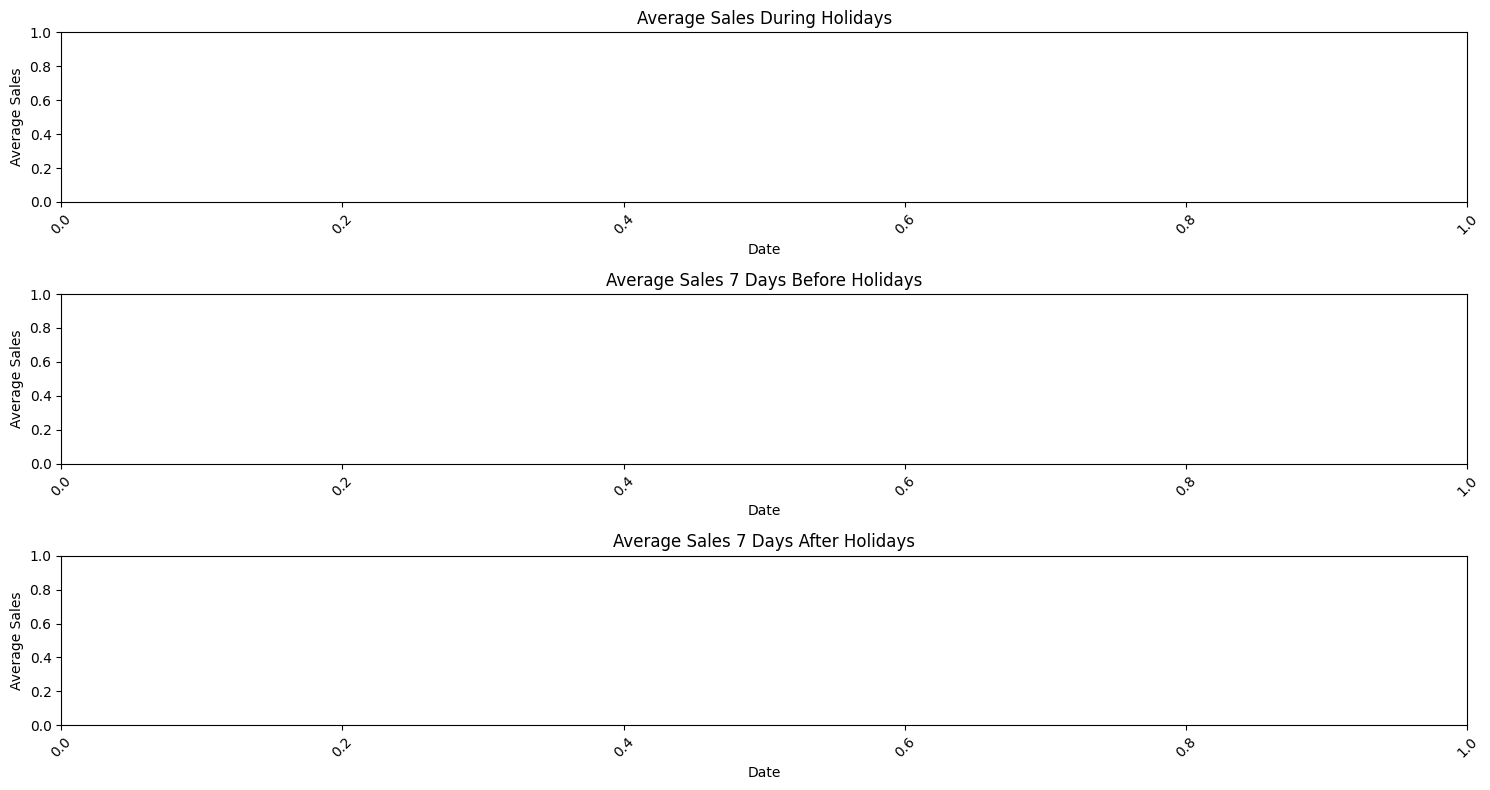

Empty DataFrame
Columns: [Date, Sales]
Index: []
Empty DataFrame
Columns: [Date, Lag_Sales]
Index: []
Empty DataFrame
Columns: [Date, Lead_Sales]
Index: []


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('avarage sales during, before seven days and after seven days of holiday')

# Ensure the Sales column is numeric, converting invalid entries to NaN
df_train['Sales'] = pd.to_numeric(df_train['Sales'], errors='coerce')

# Optionally, drop rows with NaN in the 'Sales' column, or fill them
df_train.dropna(subset=['Sales'], inplace=True)  # or df_train['Sales'].fillna(0, inplace=True)

# Create the lag and lead columns
df_train['Lag_Sales'] = df_train['Sales'].shift(7)  # Sales 7 days before
df_train['Lead_Sales'] = df_train['Sales'].shift(-7)  # Sales 7 days after

# Average sales during holidays
holiday_sales = df_train[df_train['SchoolHoliday'] == 1].groupby('Date')['Sales'].mean().reset_index()

# Average sales 7 days before holidays
pre_holiday_sales = df_train[df_train['SchoolHoliday'] == 1].groupby('Date')['Lag_Sales'].mean().reset_index()

# Average sales 7 days after holidays
post_holiday_sales = df_train[df_train['SchoolHoliday'] == 1].groupby('Date')['Lead_Sales'].mean().reset_index()

# Visualization
plt.figure(figsize=(15, 8))

# Plot for holiday sales
plt.subplot(3, 1, 1)
sns.barplot(x='Date', y='Sales', data=holiday_sales, palette='Blues')
plt.xticks(rotation=45)
plt.title('Average Sales During Holidays')
plt.xlabel('Date')
plt.ylabel('Average Sales')

# Plot for pre-holiday sales
plt.subplot(3, 1, 2)
sns.barplot(x='Date', y='Lag_Sales', data=pre_holiday_sales, palette='Greens')
plt.xticks(rotation=45)
plt.title('Average Sales 7 Days Before Holidays')
plt.xlabel('Date')
plt.ylabel('Average Sales')

# Plot for post-holiday sales
plt.subplot(3, 1, 3)
sns.barplot(x='Date', y='Lead_Sales', data=post_holiday_sales, palette='Reds')
plt.xticks(rotation=45)
plt.title('Average Sales 7 Days After Holidays')
plt.xlabel('Date')
plt.ylabel('Average Sales')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the visualizations
plt.show()

# Print the results
print(holiday_sales)
print(pre_holiday_sales)
print(post_holiday_sales)


In [ ]:
print('correlation of sales and number of customers')
Customers_sales_column = ['Sales','Customers']
Sales_customers_cor = df_train[Customers_sales_column].cor()
plt.figure(figsize=(10, 8))
sns.heatmap(Customers_sales_column, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Training Data')
plt.show()

In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [48]:
# Group by Store and Promo, and calculate mean sales
print('The cffect of promo on the sales of the store')
promo_sales = df_train.groupby(['Store', 'Promo'])['Sales'].mean().unstack()

# Print the resulting DataFrame to check the column names
print(promo_sales)

# Calculate the percentage increase in sales due to promotions
# Replace '0' and '1' with the actual column names
promo_sales['Sales Increase %'] = (promo_sales[promo_sales.columns[1]] - promo_sales[promo_sales.columns[0]]) / promo_sales[promo_sales.columns[0]] * 100

# Print the result
print(promo_sales)


The cffect of promo on the sales of the store
Promo            0             1
Store                           
1      3198.994845   5152.886111
10     3674.235395   6186.769444
100    5358.675847   8031.954545
1000   4907.923729   8108.339161
1001   3102.340206   6759.561111
...            ...           ...
995    5862.752577  10594.633333
996    3671.429553   7934.538889
997    3081.616838   6207.869444
998    2810.589347   4773.611111
999    5152.192440  11568.736111

[1115 rows x 2 columns]
Promo            0             1  Sales Increase %
Store                                             
1      3198.994845   5152.886111         61.078287
10     3674.235395   6186.769444         68.382501
100    5358.675847   8031.954545         49.886927
1000   4907.923729   8108.339161         65.209152
1001   3102.340206   6759.561111        117.885875
...            ...           ...               ...
995    5862.752577  10594.633333         80.710907
996    3671.429553   7934.538889        1

Correlation of Sales and Promo


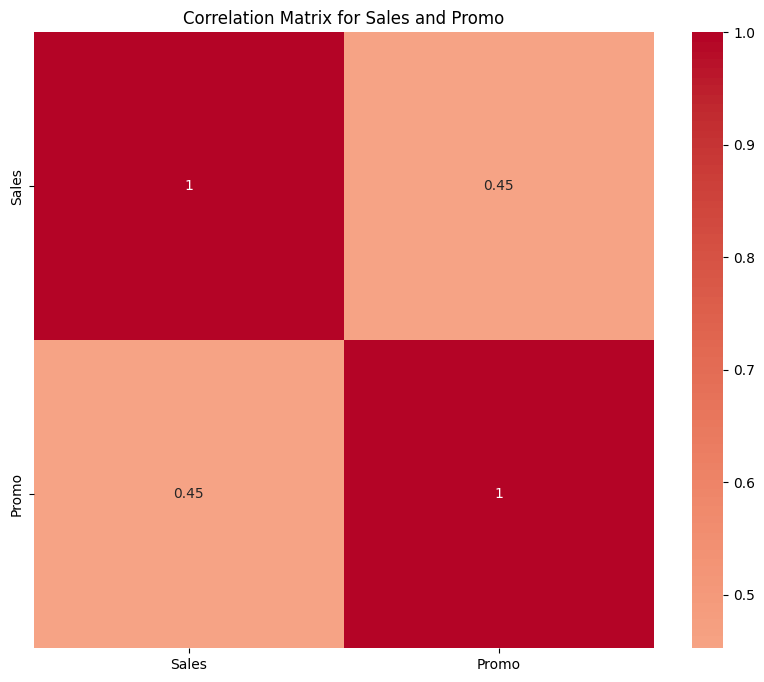

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_train is your DataFrame with 'Sales' and 'Promo' columns

# Print the correlation of sales and number of customers
print('Correlation of Sales and Promo')

# Select the relevant columns
Promo_sales_column = ['Sales', 'Promo']

# Calculate the correlation matrix
Sales_Promo_cor = df_train[Promo_sales_column].corr()  # Corrected from cor() to corr()

# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(Sales_Promo_cor, annot=True, cmap='coolwarm', center=0)

# Title and show the plot
plt.title('Correlation Matrix for Sales and Promo')
plt.show()


In [28]:
store_type_sales = df_train.groupby(['Store', 'Promo'])['Sales'].mean().unstack()
print(store_type_sales)


Promo            0             1
Store                           
1      3198.994845   5152.886111
10     3674.235395   6186.769444
100    5358.675847   8031.954545
1000   4907.923729   8108.339161
1001   3102.340206   6759.561111
...            ...           ...
995    5862.752577  10594.633333
996    3671.429553   7934.538889
997    3081.616838   6207.869444
998    2810.589347   4773.611111
999    5152.192440  11568.736111

[1115 rows x 2 columns]


In [54]:
print('the effect of number of days the store opened in a week on the sales')
df_train['Weekend'] = df_train['DayOfWeek'].apply(lambda x: 1 if x in [6, 7] else 0)
weekend_sales = df_train.groupby(['Weekend', 'Open'])['Sales'].mean()
print(weekend_sales)


the effect of number of days the store opened in a week on the sales
Weekend  Open
0        0          0.000000
         1       6955.514291
Name: Sales, dtype: float64


In [20]:
always_open_stores = df_train.groupby('Store')['Open'].sum().reset_index()
always_open_stores = always_open_stores[always_open_stores['Open'] == 6]  # Stores open every day
weekend_impact = df_train[df_train['Store'].isin(always_open_stores['Store']) & df_train['Weekend']==1]
print(weekend_impact.groupby('Store')['Sales'].mean())


Series([], Name: Sales, dtype: float64)


In [30]:
# Merge df_store and df_train on a common key, assuming 'Store' is that key
merged_df = df_store.merge(df_train[['Store', 'Sales']], on='Store')

# Group by 'Assortment' and calculate the mean sales
assortment_sales = merged_df.groupby('Assortment')['Sales'].mean()

# Print the resulting Series to check the average sales for each assortment type
print(assortment_sales)




Assortment
a    5481.026096
b    8553.931999
c    6058.676567
Name: Sales, dtype: float64


Avarage sales versus compitation distance


2024-09-22 14:13:32,546 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-22 14:13:32,549 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


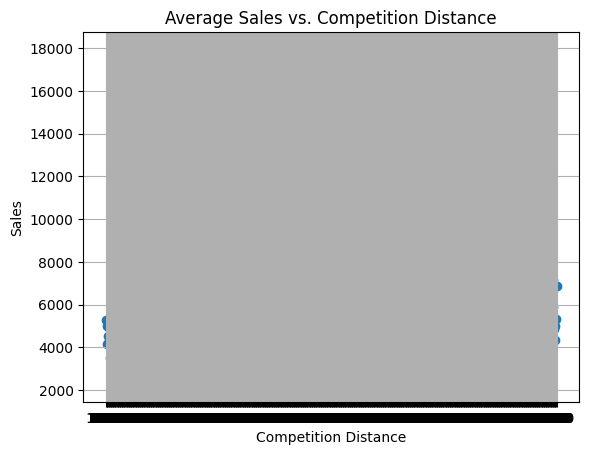

In [49]:
# Replace 'CompetitionDistance' with the correct column name if needed
# Merge the DataFrames
print('Avarage sales versus compitation distance')
merged_df = df_train.merge(df_store, on='Store')

# Group by 'CompetitionDistance' and calculate the mean sales
distance_sales = merged_df.groupby('CompetitionDistance')['Sales'].mean()

# Create a scatter plot
plt.scatter(distance_sales.index, distance_sales.values)
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.title('Average Sales vs. Competition Distance')
plt.grid(True)
plt.show()


In [39]:
# Merge the DataFrames
merged_df = df_train.merge(df_store, on='Store')

# Filter for stores where 'CompetitionDistance' is NaN
new_competitor_stores = merged_df[merged_df['CompetitionDistance'].isna()]

# Group by 'Date' and calculate the mean sales
before_after_sales = new_competitor_stores.groupby('Date')['Sales'].mean()

# Print the result
print(before_after_sales)


Date
2013-01-01       0.000000
2013-01-02    4938.333333
2013-01-03    4904.666667
2013-01-04    4840.666667
2013-01-05    3613.666667
                 ...     
2015-07-27    7663.000000
2015-07-28    6886.666667
2015-07-29    6219.666667
2015-07-30    6767.666667
2015-07-31    7452.666667
Name: Sales, Length: 942, dtype: float64


In [41]:
import logging
import pandas as pd

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Load data (replace with your actual data loading code)
# df_train = pd.read_csv('train_data.csv')
# df_store = pd.read_csv('store_data.csv')

logger.info('Data loaded successfully.')

# Merge the DataFrames
try:
    merged_df = df_train.merge(df_store, on='Store')
    logger.info('DataFrames merged successfully on Store.')
except Exception as e:
    logger.error(f'Error merging DataFrames: {e}')

# Filter for stores where 'CompetitionDistance' is NaN
try:
    new_competitor_stores = merged_df[merged_df['CompetitionDistance'].isna()]
    logger.info('Filtered new competitor stores where CompetitionDistance is NaN.')
except KeyError as e:
    logger.error(f'KeyError: {e} - Check if the column exists in the merged DataFrame.')

# Group by 'Date' and calculate the mean sales
try:
    before_after_sales = new_competitor_stores.groupby('Date')['Sales'].mean()
    logger.info('Calculated mean sales for new competitor stores by Date.')
except Exception as e:
    logger.error(f'Error calculating mean sales: {e}')

# Print the result
logger.info('Final result:')
print(before_after_sales)


2024-09-22 13:53:26,408 - INFO - Data loaded successfully.
2024-09-22 13:53:26,774 - INFO - DataFrames merged successfully on Store.
2024-09-22 13:53:26,824 - INFO - Filtered new competitor stores where CompetitionDistance is NaN.
2024-09-22 13:53:26,827 - INFO - Calculated mean sales for new competitor stores by Date.
2024-09-22 13:53:26,829 - INFO - Final result:


Date
2013-01-01       0.000000
2013-01-02    4938.333333
2013-01-03    4904.666667
2013-01-04    4840.666667
2013-01-05    3613.666667
                 ...     
2015-07-27    7663.000000
2015-07-28    6886.666667
2015-07-29    6219.666667
2015-07-30    6767.666667
2015-07-31    7452.666667
Name: Sales, Length: 942, dtype: float64


In [55]:
print(df_train.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Lag_Sales        7
Lead_Sales       7
Weekend          0
dtype: int64


In [57]:
print(df_test.isnull().sum())

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64
